# **Text Normalization in Urdu**

In [18]:
import re
import pandas as pd
from google.colab import drive
import seaborn as sns

In [3]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/dataset/UrduDataset.xlsx'
df = pd.read_excel(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Index,Headline,News Text,Category,Date,URL,Source,News length
0,0,عالمی بینک عسکریت پسندی سے متاثرہ خاندانوں کی ...,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,Business & Economics,2020-12-06,https://www.dawnnews.tv/news/1148499/,Dawn News,1854
1,1,مالی سال 2020 ریٹرن فائل کرنے والوں کی تعداد م...,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,Business & Economics,2020-12-06,https://www.dawnnews.tv/news/1148498/,Dawn News,2016
2,2,جاپان کو سندھ کے خصوصی اقتصادی زون میں سرمایہ ...,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,Business & Economics,2020-12-05,https://www.dawnnews.tv/news/1148433/,Dawn News,2195
3,3,برامدات 767 فیصد بڑھ کر ارب 16 کروڑ ڈالر سے زائد,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,Business & Economics,2020-12-05,https://www.dawnnews.tv/news/1148430/,Dawn News,2349
4,4,کے الیکٹرک کو اضافی بجلی گیس کی فراہمی کے قانو...,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,Business & Economics,2020-12-05,https://www.dawnnews.tv/news/1148421/,Dawn News,2655


In [7]:
df = df.drop(columns=['Index', 'Headline', 'Category', 'Date', 'URL', 'Source'])
df = df.dropna(subset=["News Text"])
df = df.drop_duplicates(subset=["News Text"])
df = df.reset_index(drop=True)
df

,News Text,News length
0,اسلام باد عالمی بینک خیبرپختونخوا کے قبائلی اض...,1854
1,اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی...,2016
2,اسلام باد بورڈ انویسٹمنٹ بی او ئی کے چیئرمین ع...,2195
3,اسلام اباد پاکستان میں ماہ نومبر میں مسلسل تیس...,2349
4,اسلام باد نیشنل ٹرانسمیشن اینڈ ڈسپیچ کمپنی این...,2655
...,...,...
194,کراچی سوئی سدرن گیس کمپنی ایس ایس جی سی کی جان...,2317
195,پیٹرولیم ڈویژن کے شدید احتجاج کے باوجود کابینہ...,2353
196,اسلام باد کے الیکٹرک کے لیے بجلی کی قیمتوں میں...,2690
197,کابینہ کی اقتصادی رابطہ کمیٹی ای سی سی نے بولی...,2914


In [8]:
df['length'] = df['News Text'].apply(lambda row: len(row.split()))
print('Mean length: ', df['length'].mean())

Mean length:  564.6633165829146


<Axes: xlabel='length', ylabel='Count'>

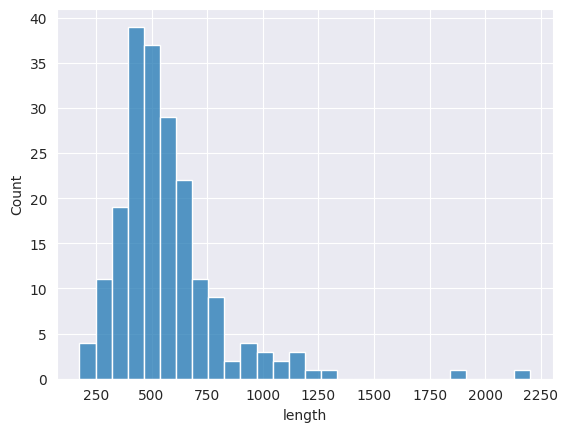

In [9]:
sns.set_style(style="darkgrid")
sns.histplot(df['length'])


In [15]:
import re
import unicodedata

def clean_urdu_text(text):
    if not isinstance(text, str):
        return text

    text = unicodedata.normalize('NFKC', text)
    text = re.sub(r'\bRT\b', ' ', text)
    text = re.sub(r'#[\w]+', ' ', text)
    text = re.sub(r'[A-Za-z]', ' ', text)
    text = re.sub(r'[0-9۰-۹]', ' ', text)
    text = re.sub(r'https?:\/\/\S+|www\.\S+', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)
    char_map = {
        'ي': 'ی',
        'ك': 'ک',
        'ة': 'ہ',
        'ۀ': 'ہ',
        'ھ': 'ہ',
        'ؤ': 'و',
        'أ': 'ا',
        'إ': 'ا',
        'آ': 'ا',
        'ٱ': 'ا',
        'ء': ''
    }

    for src, tgt in char_map.items():
        text = text.replace(src, tgt)
    text = re.sub(r'\s+', ' ', text).strip()

    return text
df["clean_text"] = df["News Text"].apply(clean_urdu_text)

In [17]:
df['clean_text'][1]

'اسلام باد فیڈرل بورڈ ریونیو ایف بی نے دسمبر کی خری تاریخ سے قبل ٹیکس سال کے لیے گزشتہ سال کے مقابلے میں تقریبا فیصد کم انکم ٹیکس گوشوارے موصول کیے ہیںڈان اخبار کی رپورٹ کے مطابق بورڈ کو دسمبر تک لاکہ ہزار ٹیکس گوشوارے موصول ہوئے جب کہ ٹیکس سال میں لاکہ ہزار ریٹرنز جمع کرائے گئے تہےان میں تنخواہ دار اور غیر تنخواہ دار افراد افرادی کمپنیوں کی ایسوسی ایشنز دونوں شامل ہیںمزید پڑہیں انکم ٹیکس گوشوراے جمع کروانے کی تاریخ میں ایک مرتبہ پہر توسیع جائزے کے دوران اس عرصے میں گوشواروں کے ساتہ وصول کیا گیا ٹیکس ارب کروڑ روپے رہا جب کہ گزشتہ سال کے اسی عرصے میں یہ ارب کروڑ روپے وصول کیا گیا تہا جو فیصد کی کمی کی عکاسی کرتا ہےٹیکس سال کے لیے انکم ٹیکس گوشوارے جمع کروانے کی خری تاریخ میں ستمبر کے بعد سے توسیع کی گئی تہی تاکہ عوام کو اپنا ریٹرن فائل کرنے میں سانی ہوٹیکس سال کے لیے ایف بی کو لاکہ ریٹرنز ملے تہے جو ایف بی کی تاریخ میں سب سے زیادہ تہےبہارت میں بادی کے مقابلے میں ریٹرن فائل کرنے کا تناسب فیصد فرانس میں فیصد اور کینیڈا میں فیصد ہے جبکہ پاکستان میں یہ تقریبا فیصد پر موجود ہےوزیر اعظم کے مع